# Linear Regression Model
<h3><i>The Normal Equation</i></h3>

In [1]:
import numpy as np
np.random.seed(42) # to make this code example reproducible
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

In [2]:
from sklearn.preprocessing import add_dummy_feature
x_b = add_dummy_feature(X) # add X0 = 1 to each instance
theta_best = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y # the @ operator performs matrics multiplication

In [3]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [4]:
# making prediction using 𝛉:
X_new  = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # add X0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

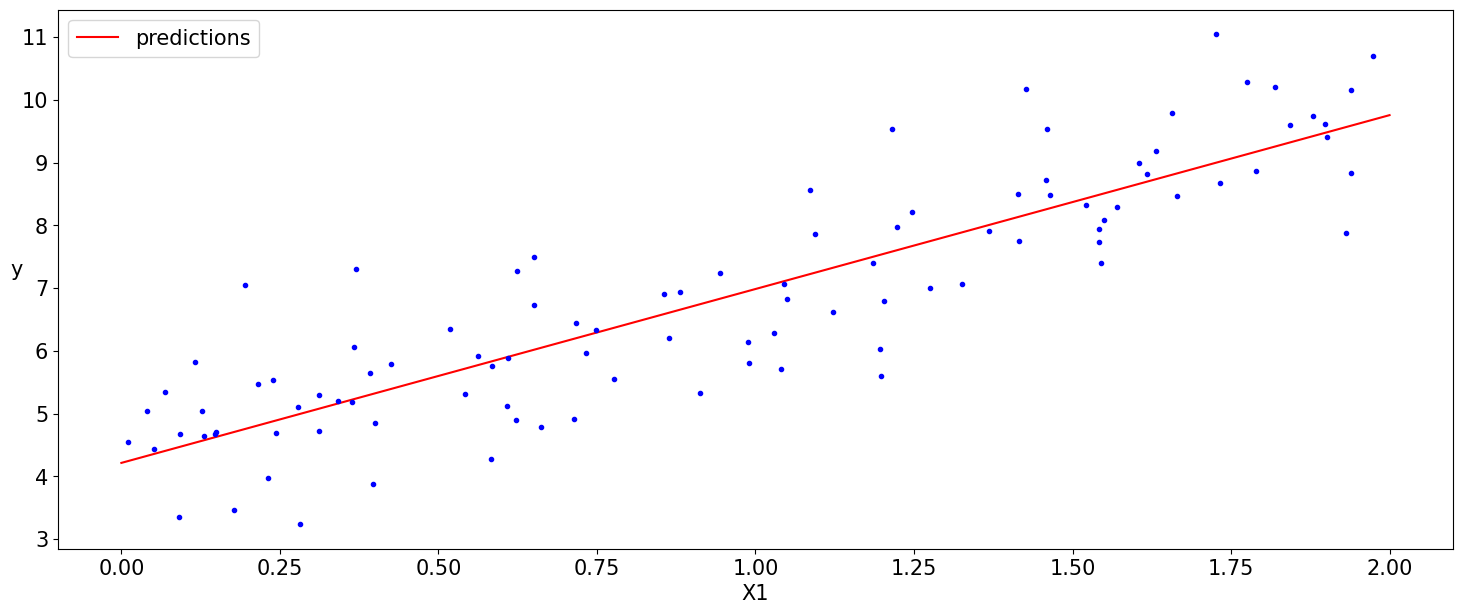

In [5]:
# plotting the model for better visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 7))
plt.plot(X_new, y_predict, "r-", label="predictions")
plt.plot(X,y, "b.")
plt.xlabel("X1", fontsize=15)
plt.ylabel("y", rotation=0, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [6]:
# performing linear regression using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [7]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [9]:
np.linalg.pinv(x_b) @ y

array([[4.21509616],
       [2.77011339]])

# Computational Complexity

<h2>Gradient Descent</h2> - a general optimization algorithm capable of 
    finding optimal solutions to a wide range or problems

<h2>Batch Gradient Descent</h2>

In [10]:
# an implementation of the algorithm
eta =.1 # learning rate
n_epochs = 1000
m = len(x_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1) # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m* x_b.T @ (x_b @ theta - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

<h2>Stochastic gradient descent</h2>
using a simple learning schedule

In [12]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index : random_index +1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [13]:
theta

array([[4.21076011],
       [2.74856079]])

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=.01,
                      n_iter_no_change=100, random_state=42) 
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

<h3>Mini-Batch Gradient Descent</h3>

# Polynomial Regression

In [16]:
# quadratic equation
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m, 1) - 3 
y = .5 * x ** 2 + x + 2 + np.random.randn(m, 1)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x[0]

array([-0.75275929])

In [18]:
x_poly[0]

array([-0.75275929,  0.56664654])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

# Learning Curve

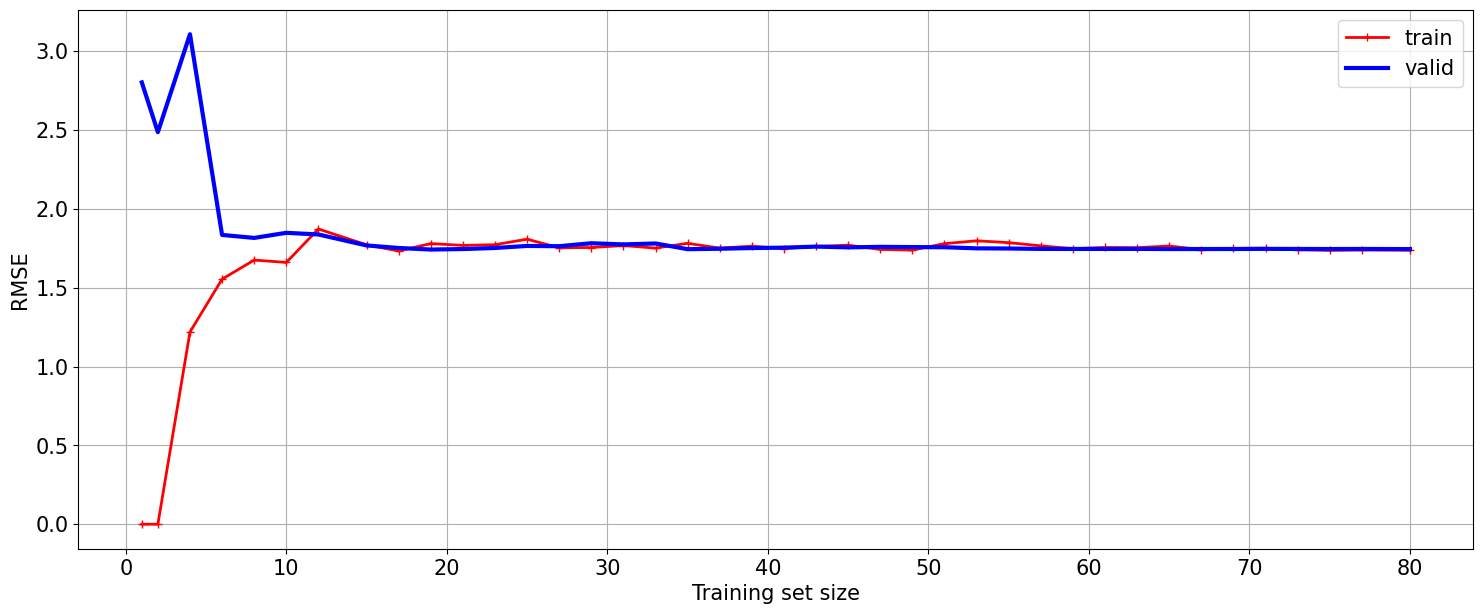

In [20]:
from sklearn.model_selection import learning_curve
plt.figure(figsize=(18, 7))
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), x, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label= "train")
plt.plot(train_sizes, valid_errors, "b-", linewidth = 3, label = "valid")
plt.grid(True, axis='both')
plt.ylabel("RMSE", fontsize=15)
plt.xlabel("Training set size",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

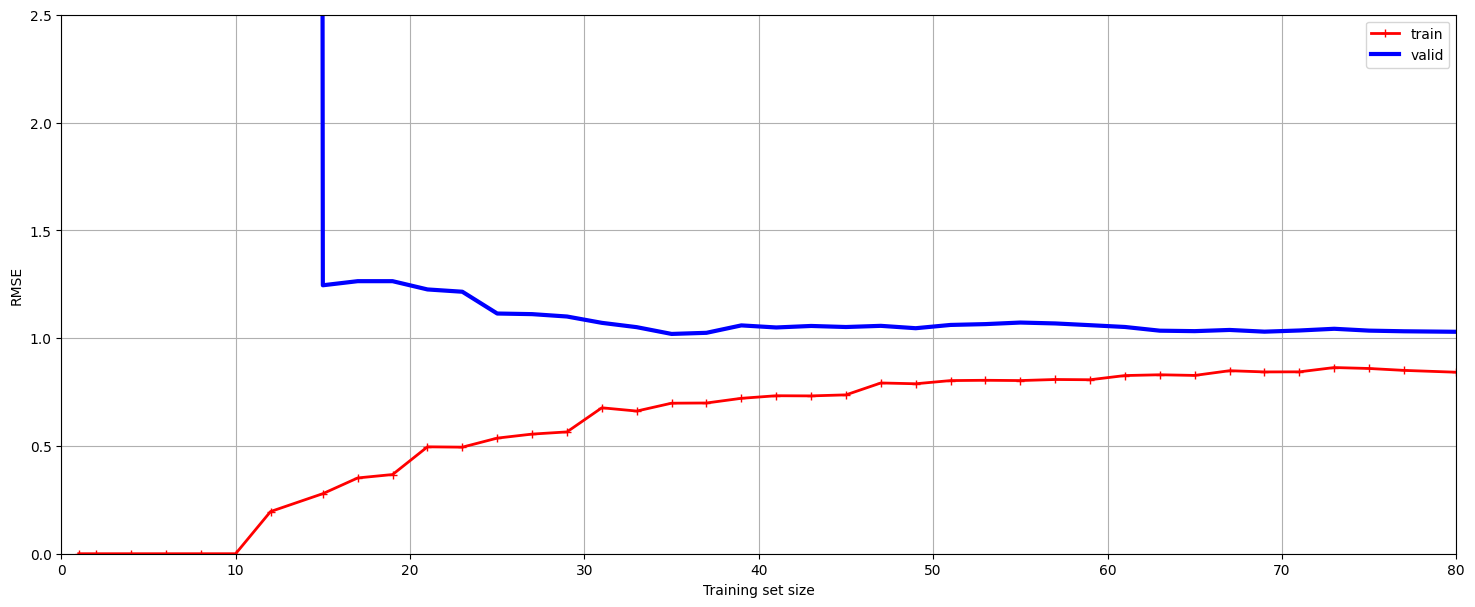

In [21]:
from sklearn.pipeline import make_pipeline
plt.figure(figsize=(18, 7))
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False), 
    LinearRegression())
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

<H2>Regularized Linear Models</H2>
<h4>Ridge regresssion</h4>

In [22]:
# Ridge regresssion
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82541643])

In [23]:
# using stochastic gradient descent
sgd_reg = SGDRegressor(penalty="l2", alpha=.1 / m, tol = None,
                      max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel()) # use y.ravel because fit() expects 1D target
sgd_reg.predict([[1.5]])

array([4.82759124])

<h3>lasso Regression</h3>
Least absolute shrinkage and selection operator regression 

In [24]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.66975945])

<h3>Elastic Net Regression</h3>

In [25]:
from sklearn.linear_model import ElasticNet
elastic_net  = ElasticNet(alpha = 0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.5827292])

# Early stopping 

In [26]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

In [27]:
from copy import deepcopy
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                             StandardScaler())
x_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

for epoch in range(n_epochs):
    sgd_reg.partial_fit(x_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

# Logistic Regression

In [28]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [29]:
iris.data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
iris.target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
#split the data into training set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


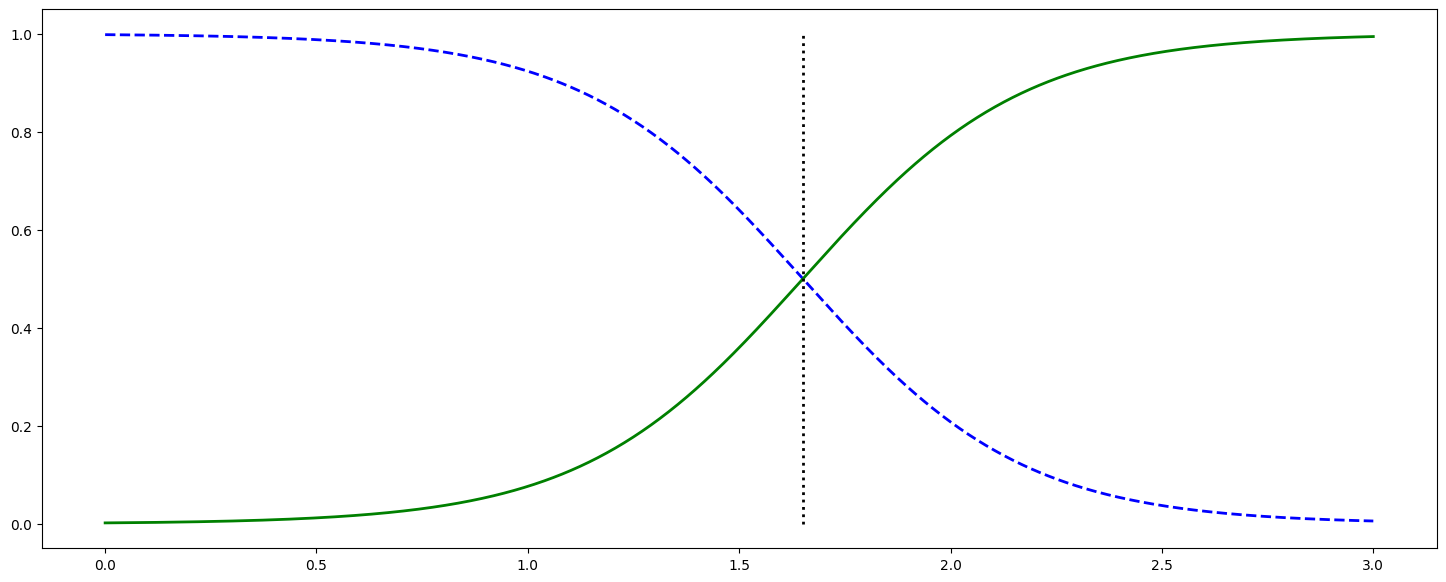

In [35]:
plt.figure(figsize=(18, 7))
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= .5][0, 0]

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label = "Not iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label = "Iris Virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="decision boundary")
plt.show()

In [36]:
decision_boundary


1.6516516516516517

In [37]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

In [38]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,30
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
softmax_reg.predict([[5, 2]])

array([2])

In [40]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])